In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff
import scipy.ndimage as ndimage
from typing import List, Tuple, Dict, Any, Optional, Callable
import glob

In [2]:
image_files = '/u/shirui/bbka/CellSighter/datasets/CellTypes/data/images/reg001_A.tif'
cell_file = '/u/shirui/bbka/CellSighter/datasets/CellTypes/cells/reg001_A.npz'
cells2labels_path = '/u/shirui/bbka/CellSighter/datasets/CellTypes/cells2labels/reg001_A.npz'

In [3]:
# Load the TIFF image
image = tiff.imread(image_files)
# image is now a NumPy array
print(image.shape)

(1440, 1920, 3)


In [4]:
# Load the segmentation and the class label
cells = np.load(cell_file, allow_pickle=True)['data'].astype(np.int64)
cell_labels = np.load(cells2labels_path, allow_pickle=True)['data'].astype(np.int32)

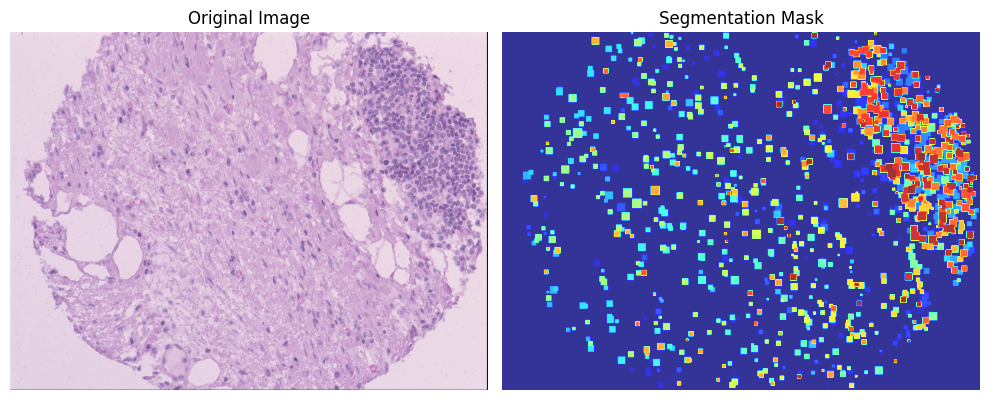

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display the image
axs[0].imshow(image, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

# Display the mask
axs[1].imshow(cells, cmap='jet', alpha=0.8)
axs[1].set_title('Segmentation Mask')
axs[1].axis('off')

plt.tight_layout()
plt.show()

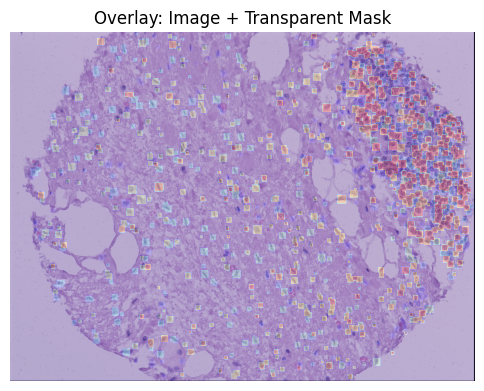

In [7]:
# Plot overlay
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')  # Base image
plt.imshow(cells, cmap='jet', alpha=0.2)  # Transparent mask on top
plt.axis('off')
plt.title('Overlay: Image + Transparent Mask')
plt.show()

In [9]:
# {
# "0": "granulocytes",
# "1": "vasculature",
# "2": "CD4+ T cells CD45RO+",
# "3": "tumor cells",
# "4": "stroma",
# "5": "CD68+CD163+ macrophages",
# "6": "adipocytes",
# "7": "plasma cells",
# "8": "CD8+ T cells",
# "9": "Tregs",
# "10": "CD4+ T cells",
# "11": "CD11c+ DCs",
# "12": "B cells",
# "13": "CD11b+CD68+ macrophages",
# "14": "smooth muscle",
# "15": "undefined",
# "16": "tumor cells / immune cells",
# "17": "immune cells / vasculature",
# "18": "immune cells",
# "19": "NK cells",
# "20": "nerves",
# "21": "CD68+ macrophages GzmB+",
# "22": "CD68+ macrophages",
# "23": "lymphatics",
# "24": "CD11b+ monocytes",
# "25": "CD4+ T cells GATA3+",
# "26": "CD163+ macrophages",
# "27": "CD3+ T cells",
# }

In [8]:
#from data.utils import load_crops

In [9]:
def load_data(fname: str) -> np.ndarray:
    """Load image data from file."""
    if fname.endswith(".npz"):
        return np.load(fname, allow_pickle=True)['data']
    elif fname.endswith((".tif", ".tiff")):
        return tiff.imread(fname)
    raise ValueError(f"Unsupported file format: {fname}")

In [10]:
def load_image(image_path: str,
              cells_path: str,
              cells2labels_path: str,
              to_pad: bool = False,
              crop_size: int = 0) -> (np.ndarray, np.ndarray, np.ndarray):
    """Load and preprocess image data."""
    # Load image data
    image = load_data(image_path)
    
    # Load cell segmentation
    cells = load_data(cells_path).astype(np.int64)
    
    # Load cell labels
    if cells2labels_path.endswith(".npz"):
        cells2labels = np.load(cells2labels_path, allow_pickle=True)['data'].astype(np.int32)
    else:
        with open(cells2labels_path, "r") as f:
            cells2labels = np.array(f.read().strip().split('\n')).astype(float).astype(int)
    
    # Pad if needed
    if to_pad:
        pad_width = crop_size // 2
        image = np.pad(image, ((pad_width, pad_width), (pad_width, pad_width), (0, 0)), 'constant')
        cells = np.pad(cells, ((pad_width, pad_width), (pad_width, pad_width)), 'constant')
    
    return image, cells, cells2labels

In [11]:
image, cells, cl2lbl = load_image(image_files, cell_file, cells2labels_path)

In [42]:
train_crops, train_working_cell_ids = load_samples(
        images_dir=data_dir,
        cells_dir=cells_dir,
        cells2labels_dir=cells2labels_dir,
        images_names=config['train_set'],
        crop_size=config['crop_size'],
        to_pad=config['to_pad']
    )

In [44]:
len(train_crops)

0

In [12]:
image, cells, cl2lbl = load_image(image_files, cell_file, cells2labels_path)